In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers

train_dataset = image_dataset_from_directory(
    "cats_vs_dogs_small\\train",
    image_size=(180,180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    "cats_vs_dogs_small\\validation",
    image_size=(180,180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    "cats_vs_dogs_small\\test",
    image_size=(180,180),
    batch_size=32)

#convolution base
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
#setting convolution base to False to freeze the weights during training
conv_base.trainable = False 

data_augmentation = keras.Sequential(
    [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    ]
)

#our model
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs) #applying data augmentation
x = keras.applications.vgg16.preprocess_input(x) #applying value scaling
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Epoch 1/50
63/63 [==============================] - 39s 458ms/step - loss: 17.1943 - accuracy: 0.8940 - val_loss: 8.8118 - val_accuracy: 0.9420
Epoch 2/50
63/63 [==============================] - 26s 411ms/step - loss: 5.4099 - accuracy: 0.9555 - val_loss: 3.6619 - val_accuracy: 0.9770
Epoch 3/50
63/63 [==============================] - 26s 419ms/step - loss: 5.4196 - accuracy: 0.9555 - val_loss: 4.4109 - val_accuracy: 0.9740
Epoch 4/50
63/63 [==============================] - 26s 418ms/step - loss: 4.7969 - accuracy: 0.9645 - val_loss: 3.3951 - val_accuracy: 0.9810
Epoch 5/50
63/63 [==============================] - 27s 421ms/step - loss: 4.5911 - accuracy: 0.9615 - val_loss: 4.4379 - val_accuracy: 0.9760
Epoch 6/50
63/63 [==============================] - 27s 425ms/step - loss: 3.3973 - accuracy: 0.9735 - val_loss: 4.2117 - val_accuracy: 0.9760
Epoch 7/50
63/63 [

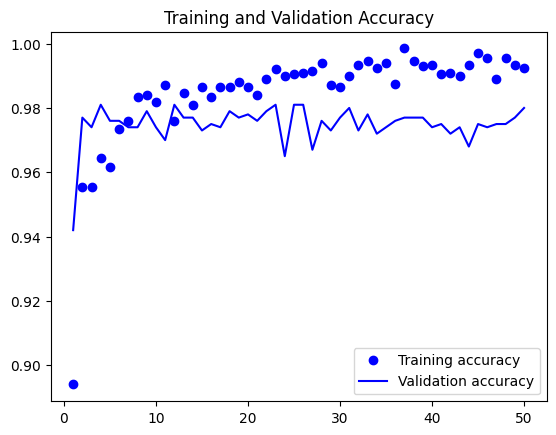

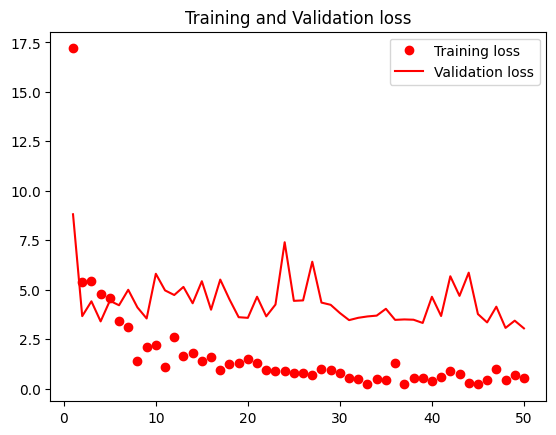

In [3]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()